In [1]:
import pandas as pd
import numpy as np


# Load the CSV file
df = pd.read_csv('scam.csv')


C:\Users\adity\AppData\Local\Temp\ipykernel_17976\189305657.py:6: DtypeWarning: Columns (2,3,4,5,6,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('scam.csv')


In [2]:
df.shape
df = df.drop(['URL','EMAIL','PHONE','lang','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10'], axis=1)

In [3]:
df.head()

,label,text
0,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...
1,ham,What's up? Do you want me to come online? If y...
2,ham,So u workin overtime nigpun?
3,ham,"Also sir, i sent you an email about how to log..."
4,spam,Please Stay At Home. To encourage the notion o...


In [4]:
# Drop rows where 'text' column is null
df = df.dropna(subset=['text'])

null_empty_count = df.isna().sum() + (df == "").sum()
print(null_empty_count)


df.shape

label    0
text     0
dtype: int64


(138812, 2)

In [5]:
df.sample(10)

,label,text
25918,spam,twitter ROCKs BillZucker ganjaboy bronxze bear...
123166,spam,New Blog Post April Fool WODs for the price of...
123472,ham,PeterBlackQUT Um What How do you use it What s...
1090,ham,Simply sitting and watching match in office..
84188,ham,Oh Lesbian Yellow Sour Fruit
73913,spam,Courses to Stop Compulsive Nail Biting Quittin...
127586,spam,Henry Winkler Assumptions are the termites of ...
8286,ham,"Non, ça devait être pour signer, mais ça sonne..."
107856,ham,it s raining here in NYC so glad am home
121794,ham,petroleyum Du kan jo gjre som meg og fjernadop...


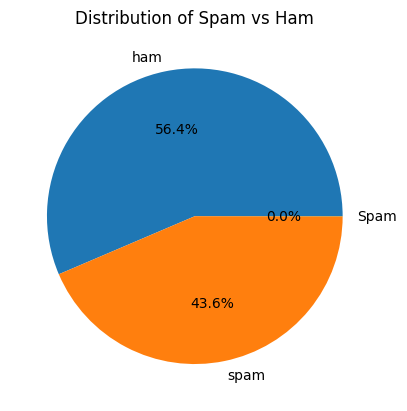

In [6]:
import matplotlib.pyplot as plt

# Pie chart
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Spam vs Ham')
plt.ylabel('')
plt.show()



In [7]:
# # Create simple features for visualization
# df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
# df['char_count'] = df['text'].apply(lambda x: len(str(x)))
# df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# # Remove any rows with NaN values
# df_clean = df.dropna(subset=['word_count', 'char_count', 'label_num'])

# # Prepare data
# X = df_clean[['word_count', 'char_count']].values
# y = df_clean['label_num'].values

# # Split data
# x_train_2d, x_test_2d, y_train_2d, y_test_2d = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train logistic regression on 2D features
# model_2d = LogisticRegression(max_iter=1000)
# model_2d.fit(x_train_2d, y_train_2d)

# # Create mesh grid for decision boundary
# x_min, x_max = X[:, 0].min() - 5, X[:, 0].max() + 5
# y_min, y_max = X[:, 1].min() - 20, X[:, 1].max() + 20

# xx, yy = np.meshgrid(
#     np.linspace(x_min, x_max, 300),
#     np.linspace(y_min, y_max, 300)
# )

# # Predict over the grid
# Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# # Plot decision boundary
# plt.figure(figsize=(12, 8))
# plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
# plt.contour(xx, yy, Z, colors='black', linewidths=2, levels=[0.5])

# # Scatter real points
# scatter = plt.scatter(df_clean['word_count'], df_clean['char_count'],
#                      c=df_clean['label_num'], cmap='coolwarm', 
#                      edgecolor='k', s=50, alpha=0.6)

# plt.colorbar(scatter, label='Label (0=Ham, 1=Spam)')
# plt.xlabel("Word Count")
# plt.ylabel("Character Count")
# plt.title("Logistic Regression Decision Boundary for Spam vs Ham")
# plt.grid(alpha=0.3)
# plt.show()

# print(f"2D Model Accuracy: {model_2d.score(x_test_2d, y_test_2d):.4f}")
# print(f"Total data points: {len(df_clean)}")

In [8]:
# df.sample(10)

In [9]:
from sklearn.model_selection import train_test_split    
from sklearn.feature_extraction.text import TfidfVectorizer

df_clean = df[df['label'].isin(['ham', 'spam'])].copy()

tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df_clean['text']) 
y = df_clean['label'].map({'ham': 0, 'spam': 1}).values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Check unique labels
print("Unique labels before cleaning:", df['label'].unique())

# Keep only rows with 'ham' or 'spam' labels

print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_clean.shape}")

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print(f"Unique values in y: {np.unique(y)}")
print(f"NaN count in y: {np.isnan(y).sum()}")

Unique labels before cleaning: ['ham' 'spam' 'Spam']
Original shape: (138812, 2)
Cleaned shape: (138789, 2)
Shape of X: (138789, 157347)
Shape of y: (138789,)
Unique values in y: [0 1]
NaN count in y: 0


In [15]:
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = MultinomialNB()
model.fit(X, y)


,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [16]:
# Predict
pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))


Accuracy: 0.89278766481735


In [ ]:
# Test the model with custom input
def predict_spam(text):
    # Transform the text using the same vectorizer
    text_vec = tfidf.transform([text])
    # Predict
    prediction = model.predict(text_vec)[0]
    probability = model.predict_proba(text_vec)[0]
    
    label = 'SPAM' if prediction == 1 else 'HAM'
    confidence = probability[prediction] * 100
    
    print(f"Text: {text}")
    print(f"Prediction: {label}")
    print(f"Confidence: {confidence:.2f}%")
    print(f"Probabilities - Ham: {probability[0]:.3f}, Spam: {probability[1]:.3f}")
    print("-" * 60)
    return label

# Test with custom messages
custom_message = "8007 25p 4 Alfie Moon's Children in Need song on ur mob. Tell ur m8s. Txt TONE CHARITY to 8007 for nokias or POLY CHARITY for polys :zed 08701417012 profit 2 charity"
predict_spam(custom_message)

Text: 8007 25p 4 Alfie Moon's Children in Need song on ur mob. Tell ur m8s. Txt TONE CHARITY to 8007 for nokias or POLY CHARITY for polys :zed 08701417012 profit 2 charity
Prediction: SPAM
Confidence: 98.76%
Probabilities - Ham: 0.012, Spam: 0.988
------------------------------------------------------------


'SPAM'

In [ ]:
import pickle

# Save the model and vectorizer
with open('spam_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

print("Model and vectorizer saved successfully!")
print("Files created:")
print("- spam_model.pkl")
print("- vectorizer.pkl")

Model and vectorizer saved successfully!
Files created:
- spam_model.pkl
- vectorizer.pkl
